In [ ]:
import pandas as pd
import seaborn as sns
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [90]:
import matplotlib.pyplot as plt
import pandas as pd

#change the path to your file location
covid_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datafiles/covid_19.csv')
covid_df.head()

,Unnamed: 0,Date,Country,Confirmed,Recovered,Deaths
0,0,2020-01-22,Afghanistan,0,0,0
1,1,2020-01-22,Albania,0,0,0
2,2,2020-01-22,Algeria,0,0,0
3,3,2020-01-22,Andorra,0,0,0
4,4,2020-01-22,Angola,0,0,0


Lấy tổng cột và hàng mảng

In [ ]:
covid_df.shape

(26884, 6)

Kiểm tra và tính tổng dữ liệu

In [ ]:
covid_df.isnull().sum()

Unnamed: 0    0
Date          0
Country       0
Confirmed     0
Recovered     0
Deaths        0
dtype: int64

Xem kiểu dữ liệu

In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26884 non-null  int64 
 1   Date        26884 non-null  object
 2   Country     26884 non-null  object
 3   Confirmed   26884 non-null  int64 
 4   Recovered   26884 non-null  int64 
 5   Deaths      26884 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.2+ MB


Thống kê cơ bản dữ liệu

In [ ]:
covid_df.describe()

,Unnamed: 0,Confirmed,Recovered,Deaths
count,26884.000000,2.688400e+04,26884.000000,26884.000000
mean,13441.500000,1.123200e+04,4140.730137,711.425346
std,7760.886655,7.660606e+04,22979.722937,5006.702433
min,0.000000,0.000000e+00,0.000000,0.000000
25%,6720.750000,0.000000e+00,0.000000,0.000000
50%,13441.500000,4.400000e+01,6.000000,1.000000
75%,20162.250000,1.268000e+03,310.000000,25.000000
max,26883.000000,2.048986e+06,547386.000000,114669.000000


Đếm số lượng các quốc gia

In [ ]:
covid_df['Country'].value_counts()

Armenia                             143
Estonia                             143
Uruguay                             143
South Africa                        143
Bhutan                              143
                                   ... 
Brazil                              143
Brunei                              143
Saint Vincent and the Grenadines    143
Saudi Arabia                        143
Barbados                            143
Name: Country, Length: 188, dtype: int64

Top 10 quốc gia bị covid trong tháng 10

In [ ]:
#top 10 countries on June-10-2020

covid_df_June10 = covid_df[covid_df['Date'] == '2020-06-10']

covid_df_top10 = covid_df_June10.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)[:10]

covid_df_top10

Country
US                2000702
Brazil             772416
Russia             493023
United Kingdom     291588
India              286605
Spain              242280
Italy              235763
Peru               208823
France             192068
Germany            186522
Name: Confirmed, dtype: int64

Thống kê về quốc gia USA sau ngày 01-05

In [ ]:
df_usa = covid_df[covid_df['Country'] == 'US']
df_usa = df_usa[df_usa['Date'] >= '2020-05-01']

print(df_usa.head(10))
print(df_usa.tail(10))

       Unnamed: 0        Date Country  Confirmed  Recovered  Deaths
18974       18974  2020-05-01      US    1104661     164015   65040
19162       19162  2020-05-02      US    1133807     175382   66465
19350       19350  2020-05-03      US    1159365     180152   67785
19538       19538  2020-05-04      US    1181728     187180   69031
19726       19726  2020-05-05      US    1205808     189791   71179
19914       19914  2020-05-06      US    1230968     189910   73566
20102       20102  2020-05-07      US    1258742     195036   75775
20290       20290  2020-05-08      US    1285782     198993   77280
20478       20478  2020-05-09      US    1311445     212534   78895
20666       20666  2020-05-10      US    1331180     216169   79628
       Unnamed: 0        Date Country  Confirmed  Recovered  Deaths
25178       25178  2020-06-03      US    1851626     479258  107201
25366       25366  2020-06-04      US    1872805     485002  108235
25554       25554  2020-06-05      US    1902810

Xóa năm và tính ngày

In [ ]:
#remove year from date 
#2020-05-01 TO 05/01
date_formatted= pd.to_datetime(df_usa['Date']).dt.strftime('%m/%d')


#print(date_formatted)

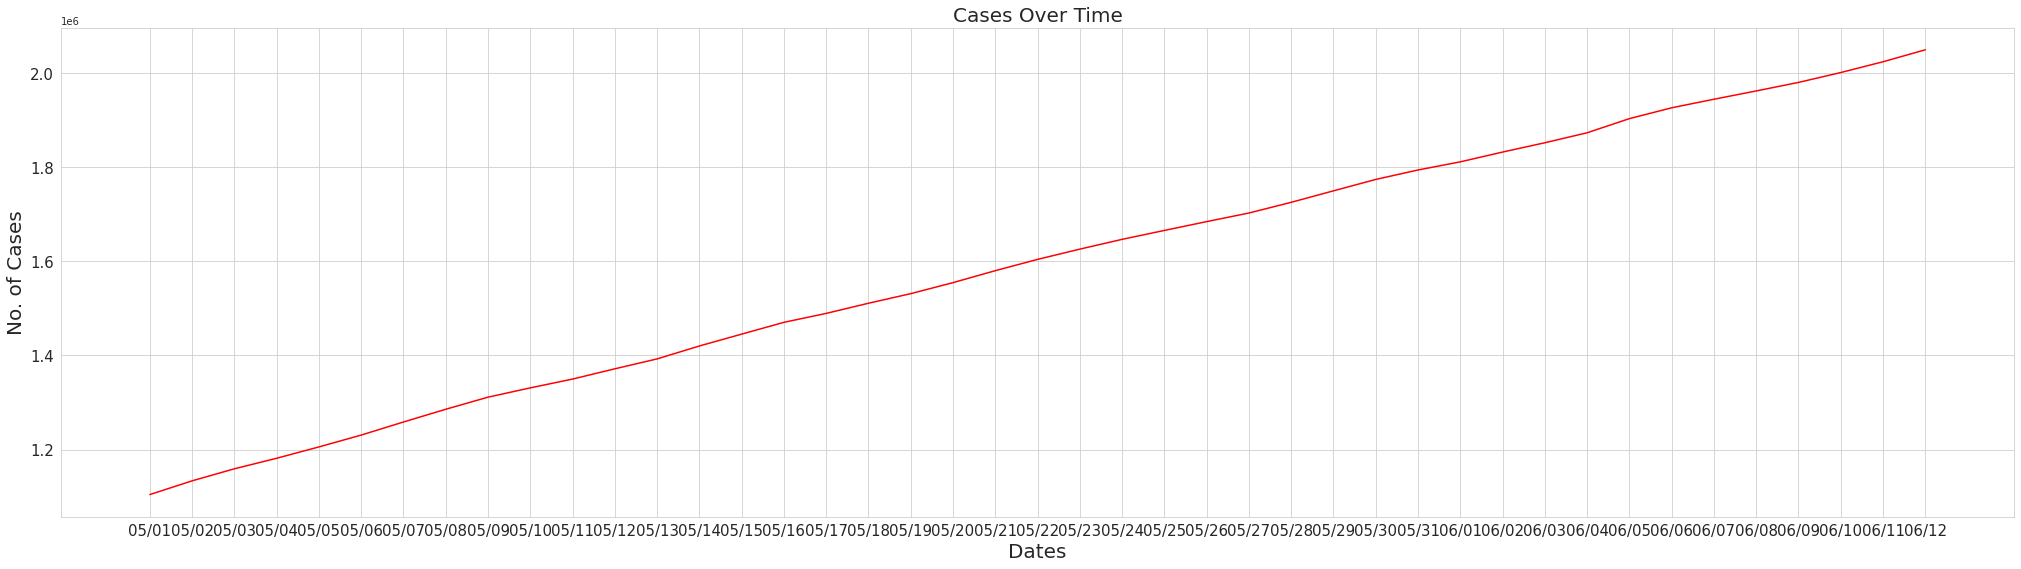

In [ ]:
#PLOT CONFIRMED CASES
plt.figure(figsize=(35, 9))
plt.plot(date_formatted, df_usa['Confirmed'],color='r')


plt.title('Cases Over Time', size=20)
plt.xlabel('Dates', size=20)
plt.ylabel('No. of Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

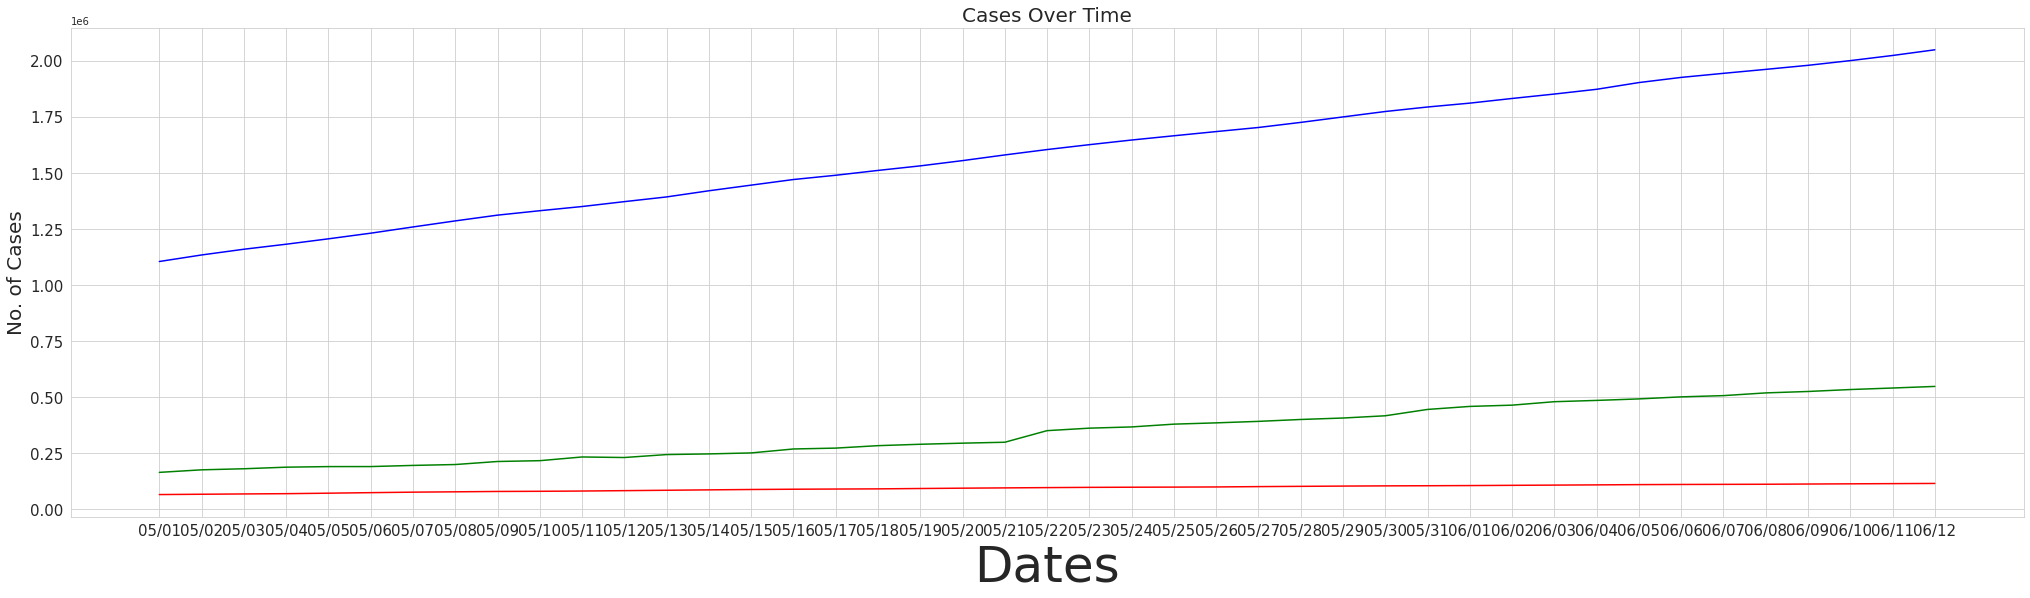

In [ ]:
plt.figure(figsize=(35, 9))
plt.plot(date_formatted, df_usa['Confirmed'],color='b')
plt.plot(date_formatted, df_usa['Deaths'] ,color='r')
plt.plot(date_formatted, df_usa['Recovered'],color='g')

plt.title('Cases Over Time', size=20)
plt.xlabel('Dates', size=50)
plt.ylabel('No. of Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

Số lượng người chết mỗi quốc gia

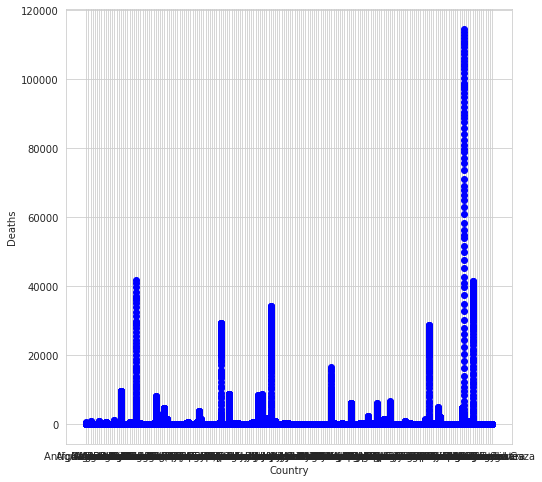

In [ ]:
plt.scatter(covid_df.Country, covid_df.Deaths,  color='blue')
plt.xlabel("Country")
plt.ylabel("Deaths")
plt.show()

Thống kê theo biểu đồ hình tròn

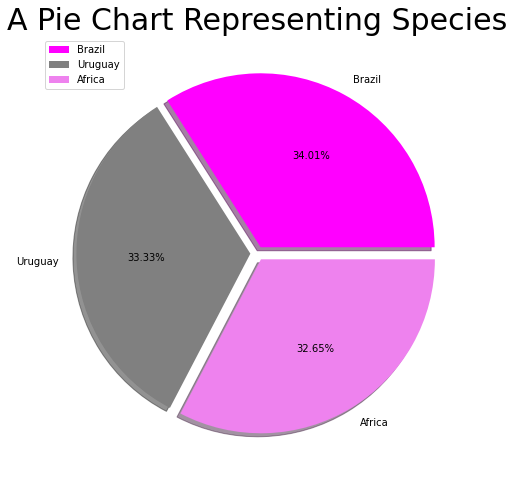

In [ ]:
# plotting a pie chart
size = [50,49,48]
labels = "Brazil", "Uruguay","Africa"
colors = ['magenta', 'grey','violet']
explode = [0.04,0.04,0.04]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors,explode = explode,shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Species', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Số lượng người chết vì covid từng ngày ở các nước

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


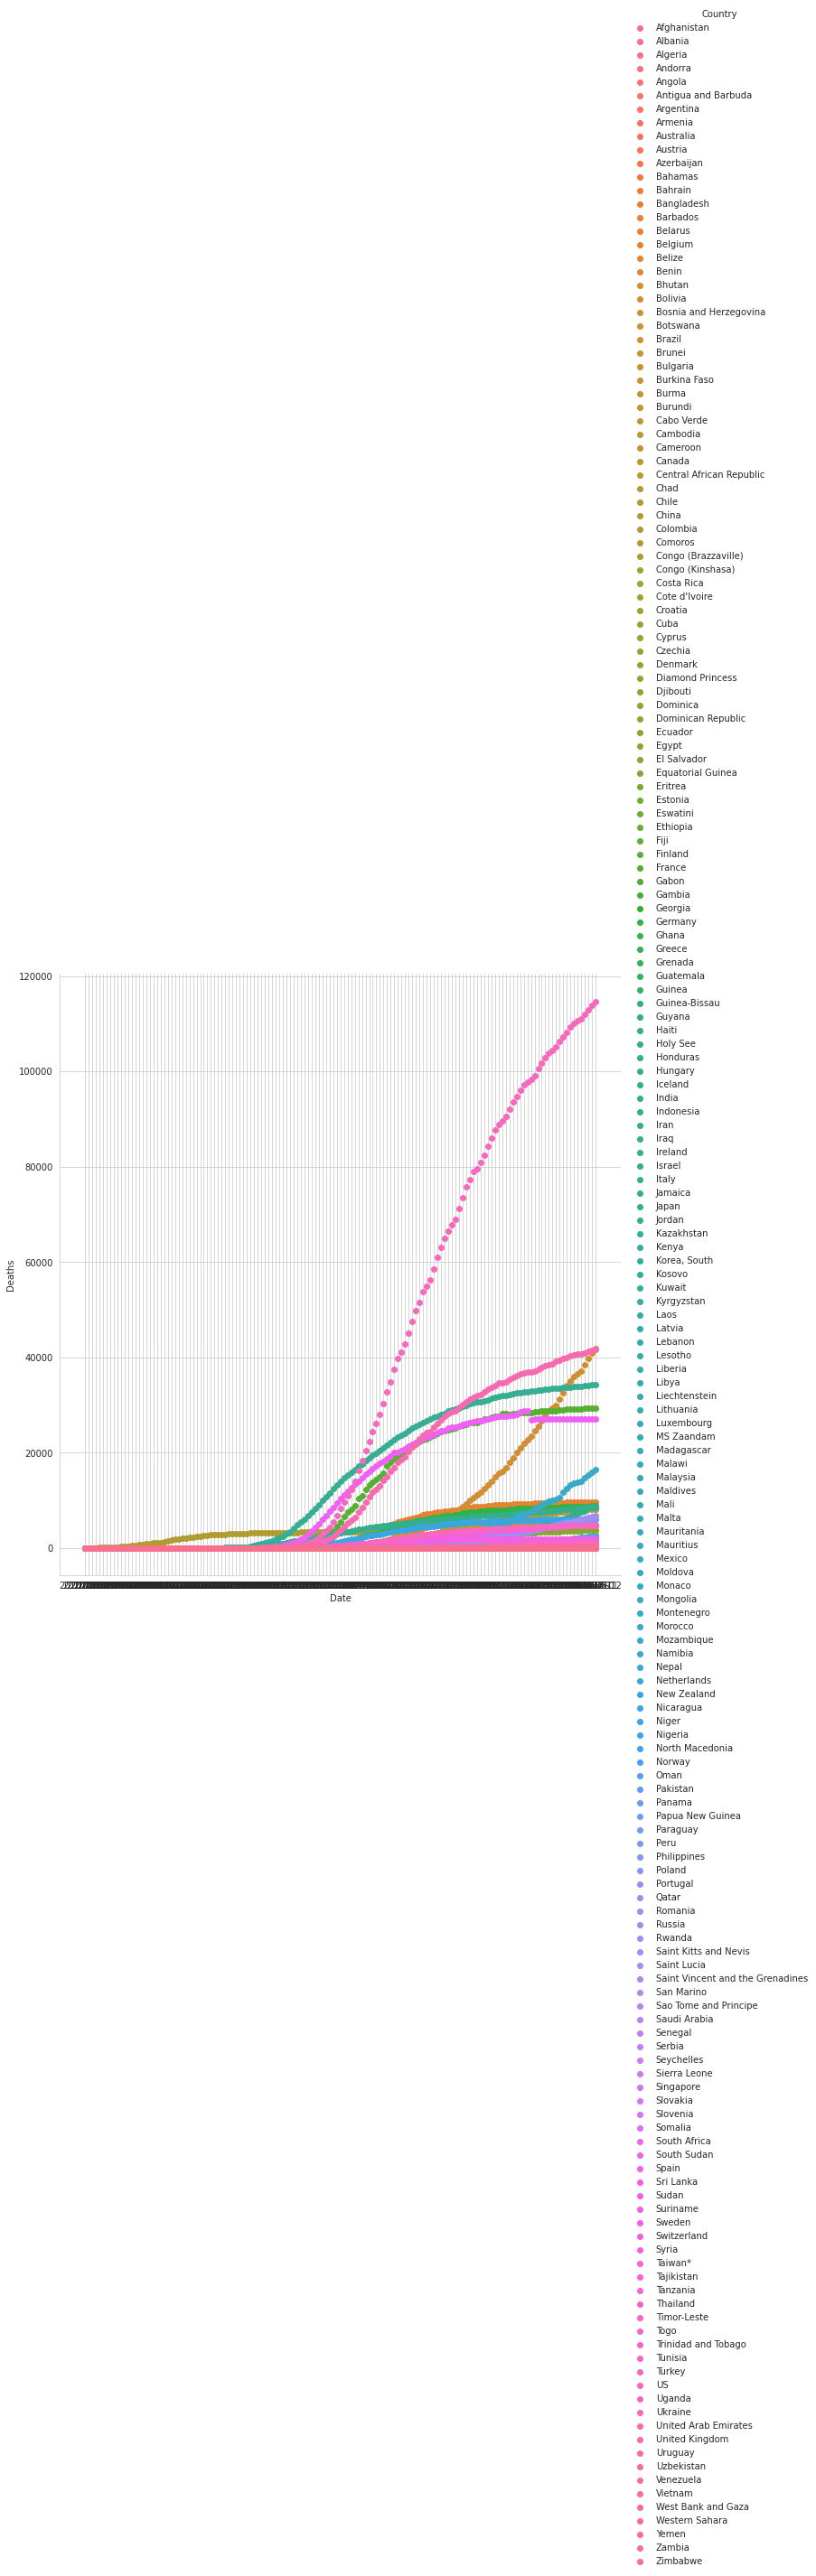

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(covid_df, hue="Country", size=10) \
   .map(plt.scatter, "Date", "Deaths") \
   .add_legend();
plt.show();

Tổng quan dữ liệu

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


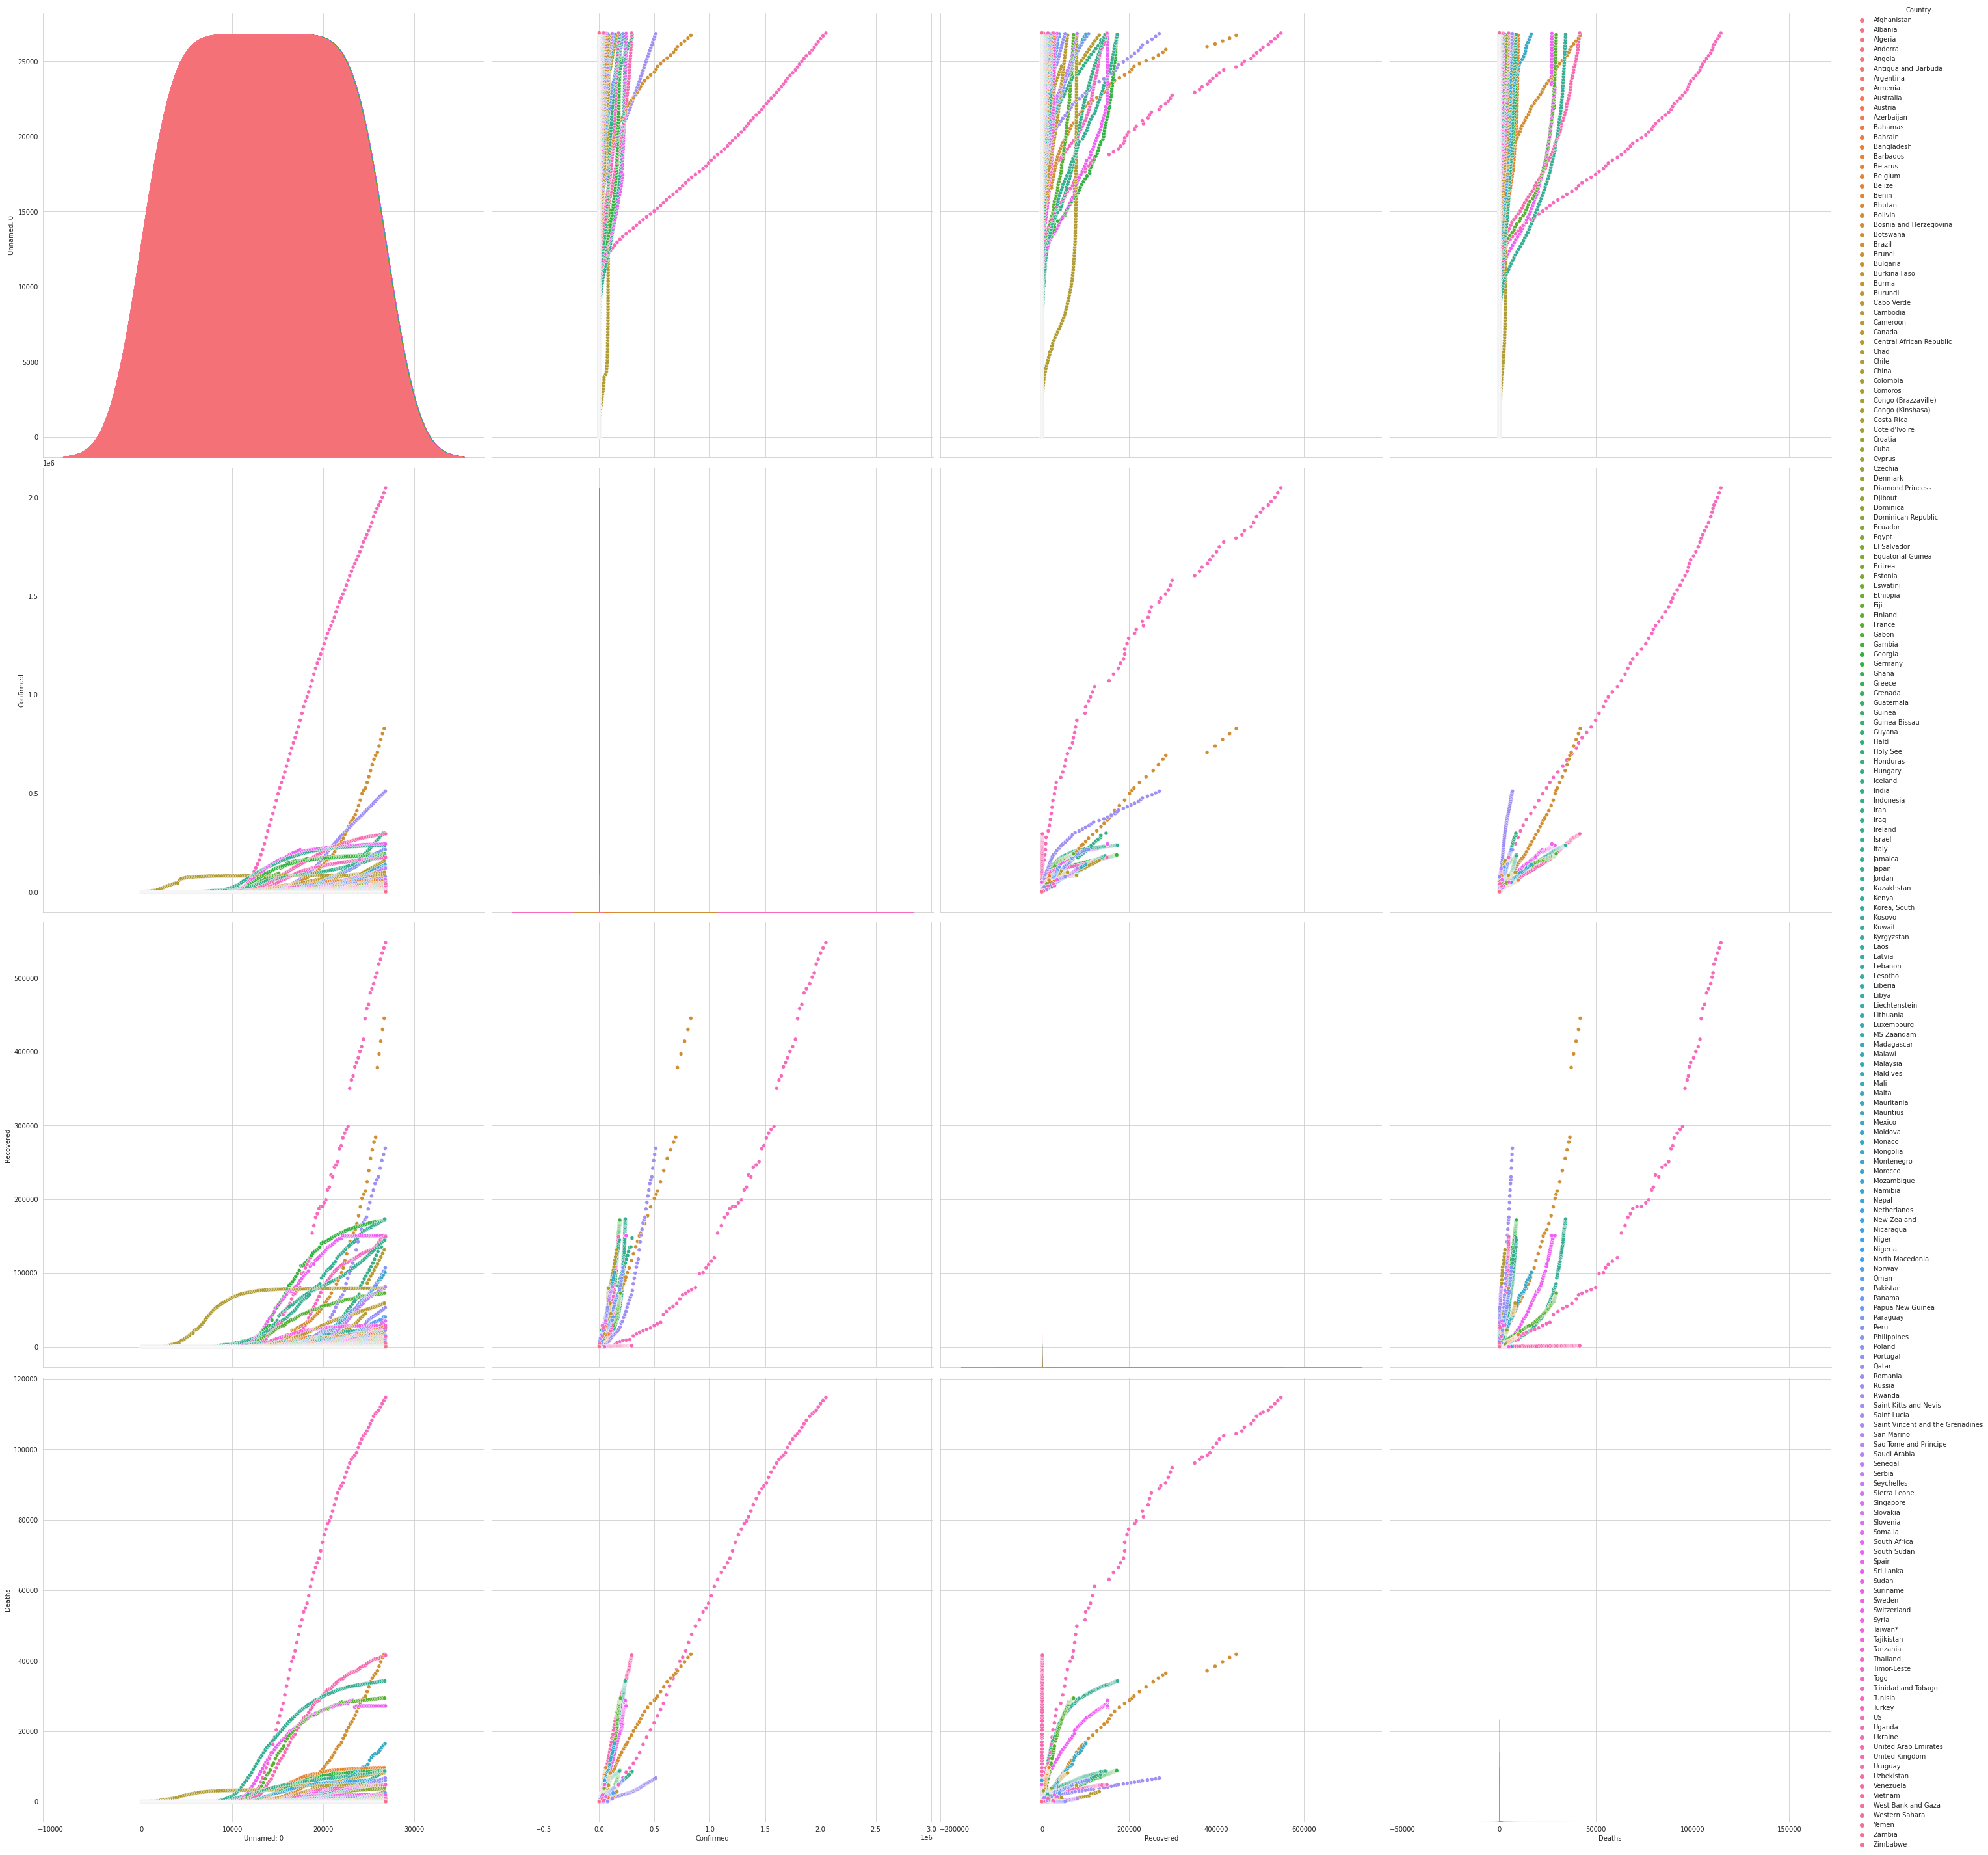

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(covid_df, hue="Country", size=10);
plt.show()

Thống kê theo quốc gia số lượng người phục hồi covid

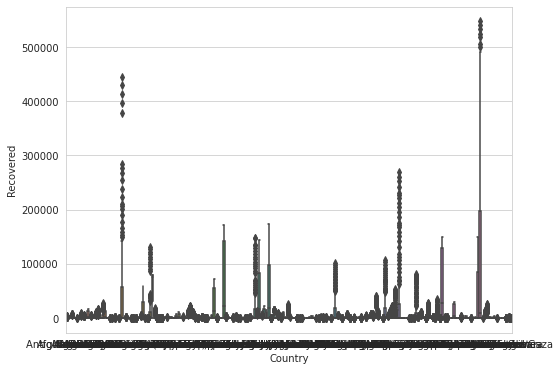

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Country',y='Recovered', data=covid_df)
plt.show()

Tính mật độ

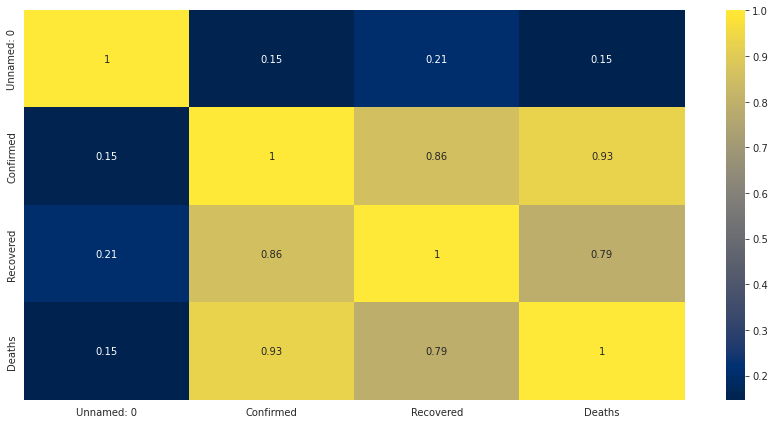

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(covid_df.corr(),annot=True,cmap='cividis')
plt.tight_layout()

Dự đoán

Ds as date and Deaths as y

In [ ]:
from fbprophet import Prophet

deaths = df_usa.iloc[:,[1,5]] #pd.to_datetime(deaths['ds'])


deaths = deaths.rename(columns={'Date':'ds','Deaths':'y'})
deaths.tail()

,ds,y
26118,2020-06-08,111042
26306,2020-06-09,112011
26494,2020-06-10,112938
26682,2020-06-11,113823
26870,2020-06-12,114669


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future_deaths = future.copy() # for non-baseline predictions later on
future.tail(8)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
42,2020-06-12
43,2020-06-13
44,2020-06-14
45,2020-06-15
46,2020-06-16
47,2020-06-17
48,2020-06-18
49,2020-06-19


In [ ]:
forecast = m.predict(future)

forecast = forecast.round(0)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
43,2020-06-13,115656.0,115417.0,115866.0
44,2020-06-14,116050.0,115644.0,116468.0
45,2020-06-15,116491.0,115747.0,117189.0
46,2020-06-16,117390.0,116281.0,118496.0
47,2020-06-17,118467.0,116917.0,119923.0
48,2020-06-18,119486.0,117540.0,121315.0
49,2020-06-19,120426.0,118004.0,122514.0


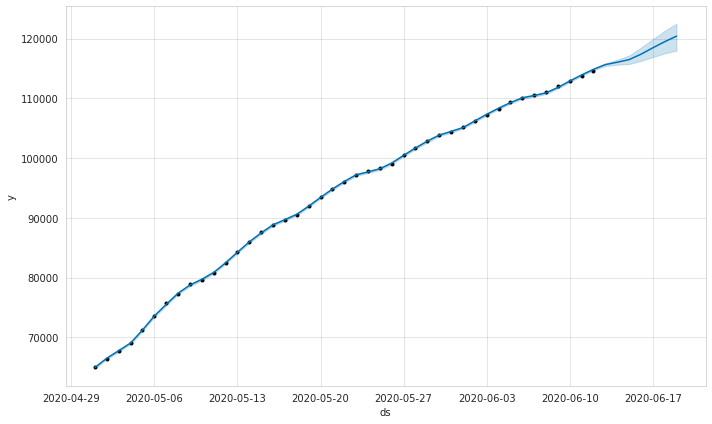

In [ ]:
deaths_forecast_plot = m.plot(forecast)

In [ ]:
import numpy as np
msk = np.random.rand(len(covid_df)) < 0.8
train = covid_df[msk]
test = covid_df[~msk]

LinearRegression

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Confirmed','Recovered','Deaths']])
y = np.asanyarray(train[['Unnamed: 0']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.01504062  0.09709064  0.09137559]]


In [ ]:
y_hat= regr.predict(test[['Confirmed','Recovered','Deaths']])
x = np.asanyarray(test[['Confirmed','Recovered','Deaths']])
y = np.asanyarray(test[['Unnamed: 0']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 58216082.63
Variance score: 0.04


In [ ]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Confirmed','Recovered','Deaths']])
y = np.asanyarray(train[['Unnamed: 0']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['Confirmed','Recovered','Deaths']])
x = np.asanyarray(test[['Confirmed','Recovered','Deaths']])
y = np.asanyarray(test[['Unnamed: 0']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[-0.01504062  0.09709064  0.09137559]]
Residual sum of squares: 58216082.63
Variance score: 0.04


In [91]:
m = len(covid_df)
y = np.array(covid_df['Country']).reshape(m, 1)
x0 = np.ones(m)
size = covid_df['Confirmed']
bedroom = covid_df['Recovered']

X = np.array([x0, size, bedroom])
X

array([[1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.320e+02, 1.321e+03,
        3.430e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.800e+01, 1.104e+03,
        5.100e+01]])

In [92]:
X_temp = np.array([size, bedroom])
X_temp

array([[   0,    0,    0, ...,  632, 1321,  343],
       [   0,    0,    0, ...,   28, 1104,   51]])

In [93]:
X_temp = X_temp.T
X_temp

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [ 632,   28],
       [1321, 1104],
       [ 343,   51]])

del covid_df['Date']

In [ ]:
del covid_df['Country']

In [ ]:
x= covid_df.drop('Deaths',axis=1)
y= covid_df['Deaths']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
features = x.columns.tolist()
target = y.value_counts().index

Streaming output truncated to the last 5000 lines.
INFO:matplotlib.font_manager:Fontsize 0.02 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.02 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.02 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.02 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.02 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.02 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.02 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.02 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.02 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.

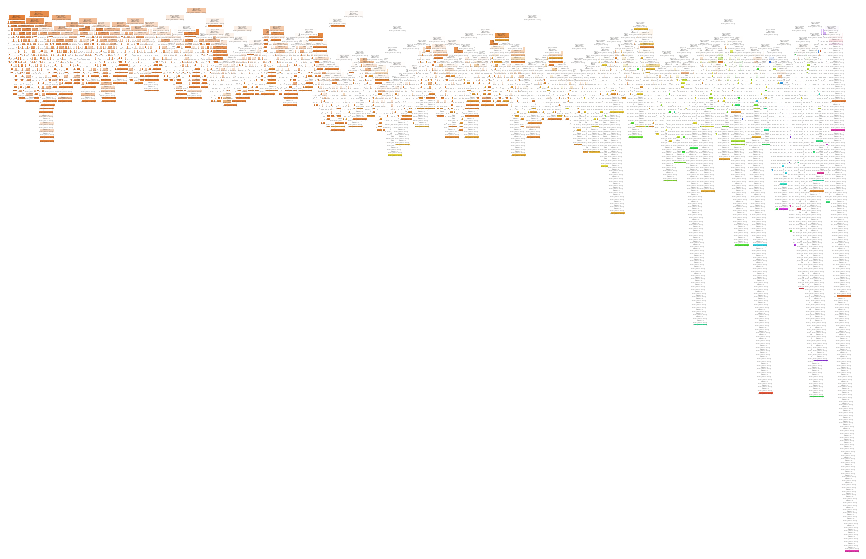

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
tree.plot_tree(model,filled = True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_train)
print(y_pred)

[  0 115   0 ...   0   1   0]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
cm

array([[11528,   246,   148, ...,     0,     0,     0],
       [  955,   167,    68, ...,     0,     0,     0],
       [  381,   126,   105, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,     1,     0,     0],
       [    0,     0,     0, ...,     0,     1,     0],
       [    0,     0,     0, ...,     0,     0,     1]])